In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import fbeta_score, f1_score, recall_score, roc_auc_score, precision_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score,RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn import set_config
from scipy.stats import chi2_contingency,spearmanr
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, roc_curve, RocCurveDisplay
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics import accuracy_score

In [172]:
df= pd.read_csv(r'fraud.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,NaN,1,1,0,1,1,0,Laborers,1.0
1,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,-1827,NaN,1,1,0,1,0,0,Cooking staff,1.0
2,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,-1029,NaN,1,1,0,1,0,0,Laborers,2.0
3,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,-4409,NaN,1,1,1,1,1,0,Sales staff,2.0
4,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,-4199,NaN,1,0,0,1,0,0,NaN,2.0


In [173]:
data.describe(include='all')

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
count,74825.000000,74825.000000,74825.000000,7.482500e+04,7.482500e+04,74821.000000,7.475500e+04,74825.000000,74825.000000,74825.000000,...,74825,74825,74825,74825,74825,74825,74825,74825,74825,74825
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60215,74157,69879,72874,74203,74632,66632,74508,73044,74452
mean,278091.438517,0.331774,0.429509,1.683915e+05,5.876002e+05,26951.015250,5.246092e+05,0.020489,-15702.466301,57569.499058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,102708.909416,0.470854,0.730592,4.424101e+05,3.879019e+05,14012.641593,3.543813e+05,0.013501,4339.689620,135655.520104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1993.500000,4.500000e+04,0.000533,-25197.000000,-17546.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,189439.000000,0.000000,0.000000,1.125000e+05,2.736360e+05,16821.000000,2.385000e+05,0.010006,-19269.000000,-2606.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,277569.000000,0.000000,0.000000,1.440000e+05,5.084955e+05,24984.000000,4.500000e+05,0.018850,-15315.000000,-1155.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,367088.000000,1.000000,1.000000,2.025000e+05,7.908300e+05,34132.500000,6.750000e+05,0.026392,-12062.000000,-326.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
data['TARGET'].value_counts()

TARGET
0    50000
1    24825
Name: count, dtype: int64

In [175]:
data.isnull().sum()

SK_ID_CURR                              0
TARGET                                  0
CNT_CHILDREN                            0
AMT_INCOME_TOTAL                        0
AMT_CREDIT                              0
                                       ..
OCCUPATION_TYPE_Realty agents           0
OCCUPATION_TYPE_Sales staff             0
OCCUPATION_TYPE_Secretaries             0
OCCUPATION_TYPE_Security staff          0
OCCUPATION_TYPE_Waiters/barmen staff    0
Length: 84, dtype: int64

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74825 entries, 0 to 74824
Data columns (total 84 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   SK_ID_CURR                                         74825 non-null  int64  
 1   TARGET                                             74825 non-null  int64  
 2   CNT_CHILDREN                                       74825 non-null  int64  
 3   AMT_INCOME_TOTAL                                   74825 non-null  float64
 4   AMT_CREDIT                                         74825 non-null  float64
 5   AMT_ANNUITY                                        74821 non-null  float64
 6   AMT_GOODS_PRICE                                    74755 non-null  float64
 7   REGION_POPULATION_RELATIVE                         74825 non-null  float64
 8   DAYS_BIRTH                                         74825 non-null  int64  
 9   DAYS_E

In [177]:
df['CNT_FAM_MEMBERS'].value_counts()

CNT_FAM_MEMBERS
2.0     37883
1.0     16671
3.0     13107
4.0      6109
5.0       902
6.0       123
7.0        15
8.0         9
10.0        2
13.0        1
11.0        1
12.0        1
Name: count, dtype: int64

In [178]:
df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].mean(), inplace = True)

In [179]:
for i in ['OCCUPATION_TYPE','NAME_TYPE_SUITE','AMT_GOODS_PRICE', 'OWN_CAR_AGE','AMT_ANNUITY','CNT_FAM_MEMBERS']:
    if df[i].dtype == 'object':
        df[i].fillna(df[i].mode()[0],inplace = True)
    else:
        df[i].fillna(df[i].median(),inplace = True)

In [180]:
df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
OWN_CAR_AGE                   0
FLAG_MOBIL                    0
FLAG_EMP_PHONE                0
FLAG_WORK_PHONE               0
FLAG_CONT_MOBILE              0
FLAG_PHONE                    0
FLAG_EMAIL                    0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
dtype: int64

In [181]:
df.duplicated().sum()

0

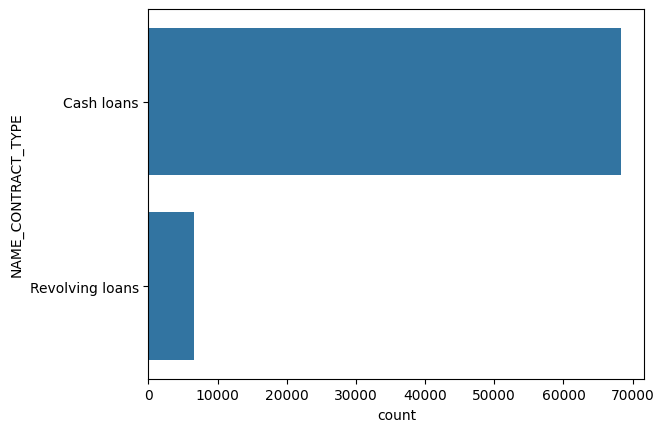

In [182]:
sns.countplot(df['NAME_CONTRACT_TYPE'])
plt.show()

In [183]:
object_df = df.select_dtypes(include = ['object'])

def cramers_v(chi2, n, k1, k2):
    return np.sqrt(chi2 / (n * min(k1 - 1, k2 - 1)))

for category in object_df.columns:
    contingency_table = pd.crosstab(df[category], df['TARGET'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    k1, k2 = contingency_table.shape
    cramers_v_value = cramers_v(chi2, n, k1, k2)
    print(f'Cramér\'s V for {category} vs Target: {cramers_v_value}\n')

Cramér's V for NAME_CONTRACT_TYPE vs Target: 0.056724609802509644

Cramér's V for CODE_GENDER vs Target: 0.0889836975788424

Cramér's V for FLAG_OWN_CAR vs Target: 0.03830285547648466

Cramér's V for FLAG_OWN_REALTY vs Target: 0.015515085228006957

Cramér's V for NAME_TYPE_SUITE vs Target: 0.01884213898579147

Cramér's V for NAME_INCOME_TYPE vs Target: 0.1101305675485262

Cramér's V for NAME_EDUCATION_TYPE vs Target: 0.1042223949794792

Cramér's V for NAME_FAMILY_STATUS vs Target: 0.06863788610998144

Cramér's V for NAME_HOUSING_TYPE vs Target: 0.06104008693859001

Cramér's V for OCCUPATION_TYPE vs Target: 0.105946299490082



In [184]:
# df = df.drop(columns=[
#     'FLAG_OWN_REALTY',
#     'NAME_TYPE_SUITE',
#     'FLAG_OWN_CAR'
# ])

In [185]:
numeric_df = df.select_dtypes(include=['number'])

for num_col in numeric_df.columns:
    if num_col != 'TARGET':  
        corr, p_value = spearmanr(df[num_col], df['TARGET'])
        print(f'Spearman Rank Correlation for {num_col} vs Target: {corr}')

Spearman Rank Correlation for SK_ID_CURR vs Target: -0.004415533076788296
Spearman Rank Correlation for CNT_CHILDREN vs Target: 0.03493403917200876
Spearman Rank Correlation for AMT_INCOME_TOTAL vs Target: -0.03462738131137933
Spearman Rank Correlation for AMT_CREDIT vs Target: -0.03086933587996085
Spearman Rank Correlation for AMT_ANNUITY vs Target: -0.00035503338583802693
Spearman Rank Correlation for AMT_GOODS_PRICE vs Target: -0.05520303140531228
Spearman Rank Correlation for REGION_POPULATION_RELATIVE vs Target: -0.055506302981362055
Spearman Rank Correlation for DAYS_BIRTH vs Target: 0.13248982581693494
Spearman Rank Correlation for DAYS_EMPLOYED vs Target: 0.045939097065032033
Spearman Rank Correlation for DAYS_REGISTRATION vs Target: 0.06706974423239773
Spearman Rank Correlation for DAYS_ID_PUBLISH vs Target: 0.08846266922376078
Spearman Rank Correlation for OWN_CAR_AGE vs Target: 0.057610727695212895
Spearman Rank Correlation for FLAG_MOBIL vs Target: nan
Spearman Rank Correla

In [186]:
# df = df.drop(columns=[
#     'SK_ID_CURR',
#     'AMT_ANNUITY',
#     'FLAG_CONT_MOBILE',
#     'FLAG_MOBIL',
#     'FLAG_EMAIL',
#     'CNT_FAM_MEMBERS'
# ])

In [187]:
def drop_features_with_high_vif(data_frame = None, vif_threshold = 5):
    features = data_frame.select_dtypes(include = 'number').drop(columns = 'TARGET').columns.tolist()
    X = data_frame[features].copy()
    imputer = SimpleImputer(strategy = 'median')
    X = pd.DataFrame(data = imputer.fit_transform(X = X), columns = features)
    
    vif_df = pd.DataFrame()
    vif_df['feature'] = X.columns
    vif_df['vif_value'] = [VIF(exog = X.values, exog_idx = i) for i in range(len(X.columns))]
    
    features_with_max_vif_value = []
    
    while vif_df.vif_value.max() > vif_threshold:
        feature_with_max_vif_value = vif_df.loc[vif_df.vif_value == vif_df.vif_value.max(), 'feature'].values[0]
        features_with_max_vif_value.append(feature_with_max_vif_value)
        X.drop(columns = feature_with_max_vif_value, inplace = True)
        
        vif_df = pd.DataFrame()
        vif_df['feature'] = X.columns
        vif_df['vif_value'] = [VIF(exog = X.values, exog_idx = i) for i in range(len(X.columns))]
    
    data_frame.drop(columns = features_with_max_vif_value, inplace = True)
    
    return data_frame

In [188]:
df = drop_features_with_high_vif(data_frame = df)

# İlk beş sətirin göstərilməsi
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE
0,1,Cash loans,M,N,Y,0,202500.0,351000.0,Unaccompanied,Working,...,House / apartment,0.018801,-637,-3648.0,-2120,10.0,0,1,0,Laborers
1,1,Cash loans,F,N,Y,0,112500.0,702000.0,Unaccompanied,Working,...,House / apartment,0.018029,-2628,-6573.0,-1827,10.0,0,0,0,Cooking staff
2,1,Cash loans,M,N,Y,0,202500.0,855000.0,Unaccompanied,Commercial associate,...,House / apartment,0.025164,-1262,-1182.0,-1029,10.0,0,0,0,Laborers
3,1,Cash loans,F,N,N,0,135000.0,238500.0,Unaccompanied,Working,...,House / apartment,0.007305,-3597,-45.0,-4409,10.0,1,1,0,Sales staff
4,1,Cash loans,F,N,Y,0,81000.0,252000.0,Unaccompanied,Pensioner,...,House / apartment,0.028663,365243,-5391.0,-4199,10.0,0,0,0,Laborers


In [165]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE'],
      dtype='object')

In [189]:
categorical_columns = [
    'NAME_CONTRACT_TYPE','FLAG_OWN_CAR',
    'CODE_GENDER','FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE','NAME_TYPE_SUITE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE'
]

df = pd.get_dummies(df, columns=categorical_columns)

In [190]:
df.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_WORK_PHONE,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,1,0,202500.0,351000.0,0.018801,-637,-3648.0,-2120,10.0,0,...,True,False,False,False,False,False,False,False,False,False
1,1,0,112500.0,702000.0,0.018029,-2628,-6573.0,-1827,10.0,0,...,False,False,False,False,False,False,False,False,False,False
2,1,0,202500.0,855000.0,0.025164,-1262,-1182.0,-1029,10.0,0,...,True,False,False,False,False,False,False,False,False,False
3,1,0,135000.0,238500.0,0.007305,-3597,-45.0,-4409,10.0,1,...,False,False,False,False,False,False,True,False,False,False
4,1,0,81000.0,252000.0,0.028663,365243,-5391.0,-4199,10.0,0,...,True,False,False,False,False,False,False,False,False,False


In [191]:
X = data.drop(columns =['TARGET'])
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50132, 83), (50132,), (24693, 83), (24693,))

In [118]:
df.isnull().sum().sum()

0

In [119]:
print(df.isnull().sum(axis=1).value_counts())

0    74825
Name: count, dtype: int64


In [192]:
model_log = LogisticRegression()

In [193]:
model_log.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [1]:
# # Yüksək VİF dəyərlərinə sahib olan dəyişənlərin datasetdən çıxarılması üçün funksiyanın yazılması
# def drop_features_with_high_vif(data_frame = None, vif_threshold = 5):
#     features = data_frame.select_dtypes(include = 'number').drop(columns = 'TARGET').columns.tolist()
#     X = data_frame[features].copy()
#     imputer = SimpleImputer(strategy = 'median')
#     X = pd.DataFrame(data = imputer.fit_transform(X = X), columns = features)
    
#     vif_df = pd.DataFrame()
#     vif_df['feature'] = X.columns
#     vif_df['vif_value'] = [VIF(exog = X.values, exog_idx = i) for i in range(len(X.columns))]
    
#     features_with_max_vif_value = []
    
#     while vif_df.vif_value.max() > vif_threshold:
#         feature_with_max_vif_value = vif_df.loc[vif_df.vif_value == vif_df.vif_value.max(), 'feature'].values[0]
#         features_with_max_vif_value.append(feature_with_max_vif_value)
#         X.drop(columns = feature_with_max_vif_value, inplace = True)
        
#         vif_df = pd.DataFrame()
#         vif_df['feature'] = X.columns
#         vif_df['vif_value'] = [VIF(exog = X.values, exog_idx = i) for i in range(len(X.columns))]
    
#     data_frame.drop(columns = features_with_max_vif_value, inplace = True)
    
#     return data_frame

In [2]:
# # drop_features_with_high_vif() funksiyası ilə yüksək VİF dəyərlərinə sahib olan dəyişənlərin datasetdən çıxarılması
# df = drop_features_with_high_vif(data_frame = df)

# # İlk beş sətirin göstərilməsi
# df.head()